In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset - matching your filename 'Sample - Superstore.csv'
df = pd.read_csv('Sample - Superstore.csv', encoding='windows-1252')

# This shows the first 5 rows of your data
print("--- Data Loaded Successfully! ---")
df.head()

--- Data Loaded Successfully! ---


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
# Check for duplicates and clean up column names
duplicates = df.duplicated().sum()
print(f"Duplicates found: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")

# Fix column names (remove spaces)
df.columns = df.columns.str.replace(' ', '_').str.replace('-', '_')

print("\nColumn names are now clean!")
df.head(2)

Duplicates found: 0

Column names are now clean!


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [3]:
# 1. Convert Order_Date to a proper datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# 2. Extract Year and Month for easier analysis
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month_name()

# 3. Create a 'Month_Year' column for plotting trends
df['Order_Month'] = df['Order_Date'].dt.to_period('M').astype(str)

print("Time columns created successfully!")
df[['Order_Date', 'Year', 'Month', 'Order_Month']].head()

Time columns created successfully!


,Order_Date,Year,Month,Order_Month
0,2016-11-08,2016,November,2016-11
1,2016-11-08,2016,November,2016-11
2,2016-06-12,2016,June,2016-06
3,2015-10-11,2015,October,2015-10
4,2015-10-11,2015,October,2015-10


In [4]:
# Calculate high-level KPIs
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
overall_profit_margin = (total_profit / total_sales) * 100

print(f"--- Business Snapshot ---")
print(f"Total Revenue: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Overall Profit Margin: {overall_profit_margin:.2f}%")

--- Business Snapshot ---
Total Revenue: $2,297,200.86
Total Profit: $286,397.02
Overall Profit Margin: 12.47%


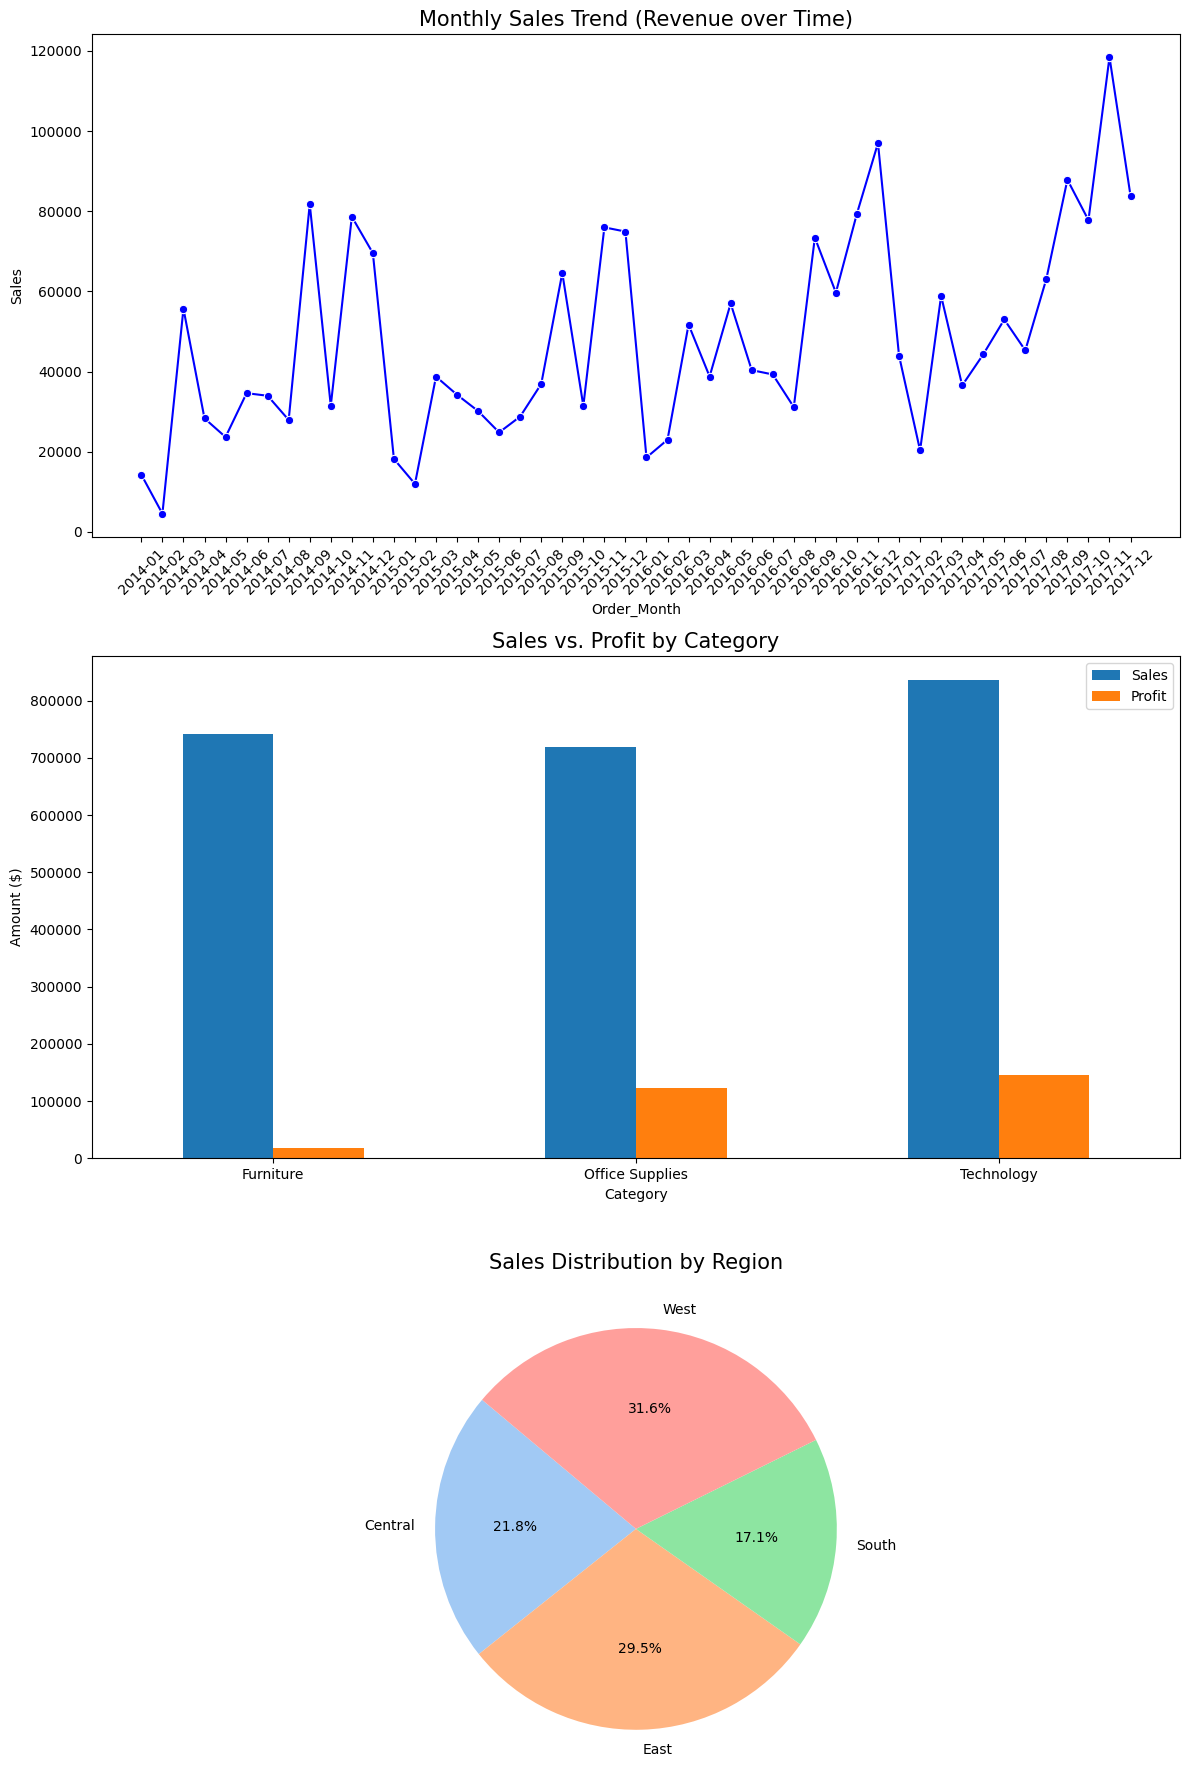

In [5]:
# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# 1. Sales Trend Over Time (Line Chart)
# We group by Order_Month to see the timeline
monthly_sales = df.groupby('Order_Month')['Sales'].sum().reset_index()
sns.lineplot(data=monthly_sales, x='Order_Month', y='Sales', marker='o', ax=axes[0], color='blue')
axes[0].set_title('Monthly Sales Trend (Revenue over Time)', fontsize=15)
axes[0].tick_params(axis='x', rotation=45)

# 2. Profitability by Category (Bar Chart)
# This shows which business segments are making money
category_perf = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
category_perf.plot(x='Category', kind='bar', ax=axes[1])
axes[1].set_title('Sales vs. Profit by Category', fontsize=15)
axes[1].set_ylabel('Amount ($)')
axes[1].tick_params(axis='x', rotation=0)

# 3. Regional Performance (Pie Chart)
# Shows where the most orders are coming from
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='pie', autopct='%1.1f%%', ax=axes[2], startangle=140, colors=sns.color_palette('pastel'))
axes[2].set_title('Sales Distribution by Region', fontsize=15)
axes[2].set_ylabel('') # Hides the vertical 'Sales' label

plt.tight_layout()
plt.show()

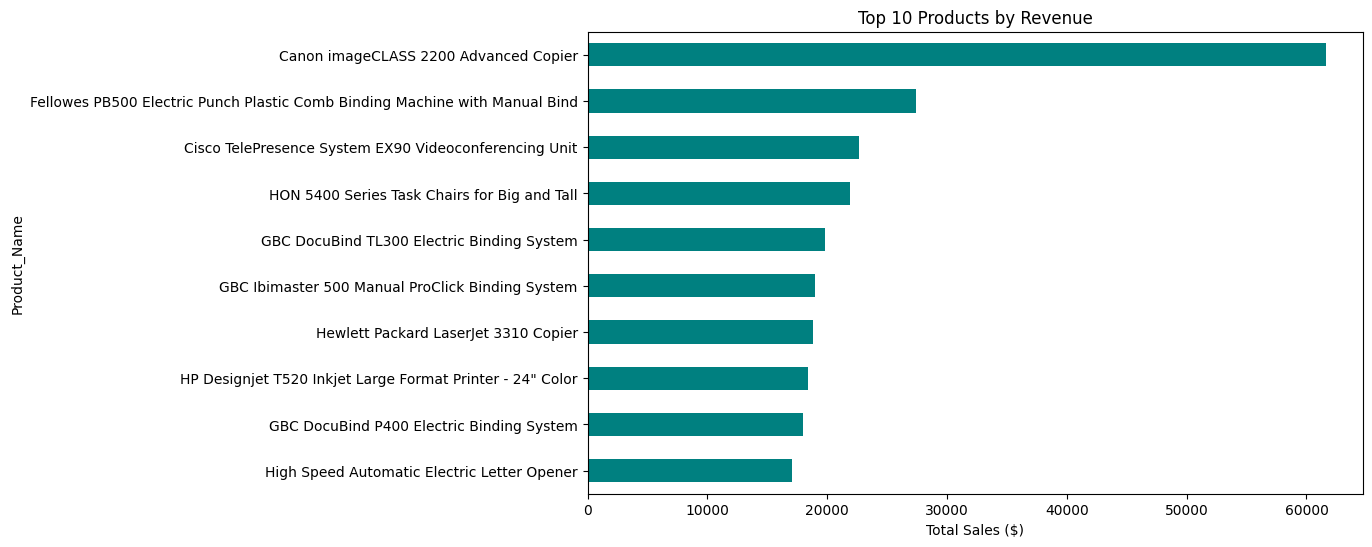

In [6]:
# Top 10 Products by Sales
top_products = df.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='barh', color='teal')
plt.gca().invert_yaxis() # Highest sales at the top
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Sales ($)')
plt.show()

🚀 Key Business Insights & Recommendations

Primary Revenue Source: The Technology category serves as the driving force behind the business, yielding the highest sales figures. Nonetheless, it is crucial to monitor shipping expenses, as they can diminish profit margins in this area.

Regional Advantage: The West Region stands out as our most lucrative market. It would be prudent to consider augmenting our marketing budget in this region to capitalize on our successes.

The "Profit Trap": Although Furniture generates substantial sales volume, its profit margin is considerably lower compared to Office Supplies.

Suggestion: Combining furniture with high-margin office supplies (such as desk organizers) may enhance the overall profit per transaction.

Seasonal Trends: Sales patterns indicate a notable increase towards the end of the year (Q4).

Suggestion: The business should raise inventory levels by 20% beginning in October to avoid stock shortages during the holiday season.